In [1]:
%matplotlib inline

import numpy as np
import copy
import matplotlib.pyplot as plt
import pickle
import random
import torch
from utils import torch_from_numpy
import datetime

from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early, cfg_policy_evaluation_maxiter
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early
# num_iter_max=200000
env_name = 'CustomCartPole-v0'
figfilenamehead = "fig_policy_optimization_"+env_str+"_iter2_"

from config import cfg_alpha
alpha=cfg_alpha

loss_list = []
normalized_loss_list = []

policy_evaluation_maxiter = cfg_policy_evaluation_maxiter
print("policy_evaluation_maxiter",policy_evaluation_maxiter)
print("alpha",alpha)
print("seed",seed)
print(datetime.datetime.now())

policy_evaluation_maxiter 5
alpha 0.2
seed 1
2023-07-24 09:49:23.280237


In [2]:
import gym
import custom_gym
env = gym.make(env_name)

np.random.seed(seed)
random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)

4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:


from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
agent = SAC(env.observation_space.shape[0]+z_dim*2, env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_bamdp_weightedvae_")


offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))
debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)

Loading models from checkpoints/sac_checkpoint_custom_cartpole_bamdp_weightedvae_


In [4]:
args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":agent.policy.my_np_select_action,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}
# import vi_base
# vi = vi_base.baseVI(args_init_dict)
import vi_iw
iwvi = vi_iw.iwVI(args_init_dict)

# iwvi.load_base(ckpt_key="unweighted")
iwvi.load(ckpt_key="policy_optimization_iter1")

dec: h_dim 64
iwvi load ckpt1, ckpt2 ckpt_iwvi_basepartcartpole_policy_optimization_iter1 ckpt_iwvi_cartpole_policy_optimization_iter1
base load ckpt ckpt_basevi_cartpole_policy_optimization_iter1
base load self.initial_belief.data.sum() tensor(-5.6296)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-19.8965)
penalty_target_min tensor(-12.3238) penalty_target_max tensor(38.5193)
train_loss:  -11.180135067749024
valid_loss:  -10.258049133300782
h_min_tilde -12.323818 ell_tilde -10.995717880859374 kappa_tilde 0.0008677298917092593
success load ckpt_iwvi_basepartcartpole_policy_optimization_iter1
train_loss:  -9.89424626375735
valid_loss:  -17.719981021118166
weight_alpha 1.0 h_min_tilde -12.323818 ell_tilde -11.459393215229513 kappa_tilde 0.0010755642110345167


In [5]:
# plt.figure(figsize=(18,10), dpi=250)
# np_mulogvar = iwvi.mulogvar_offlinedata.numpy()
# plt.xlabel("daming coeff")
# plt.ylabel("latent variable mean")

# plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
# plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
# # plt.xlim([-0.05,0.35])
# for i in range(len(debug_info)):
#     plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
# plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.png")
# plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.eps")
# # plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.pdf")
# plt.show()


# for i in range(10):
#     print(debug_info[i*10 : (i+1)*10,1])
# # plt.show()
# print("摩擦係数-潜在変数")

In [6]:
iwvi.get_real_rollout_bamdppolicy_data()


 0 7.152557373046875e-07


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):



 1 3.1374526023864746

 2 3.1622862815856934

 3 3.2673559188842773

 4 3.1958184242248535

 5 3.2068536281585693

 6 3.35563588142395

 7 3.11727237701416

 8 3.3486461639404297

 9 3.373782157897949

 10 3.346771001815796

 11 3.346543073654175

 12 3.28061580657959

 13 3.2091691493988037

 14 3.2543089389801025

 15 3.2480595111846924

 16 3.1953861713409424

 17 3.24123215675354

 18 3.22244930267334

 19 3.200265407562256

 20 3.3046865463256836

 21 3.1560776233673096

 22 3.1085140705108643

 23 3.343803644180298

 24 3.2124457359313965

 25 3.7062418460845947

 26 3.3631703853607178

 27 3.273045778274536

 28 3.237929344177246

 29 3.336906671524048

 30 3.393441915512085

 31 3.358436346054077

 32 3.448767900466919

 33 3.2830424308776855

 34 3.226731300354004

 35 3.2732231616973877

 36 3.3339428901672363

 37 3.261320114135742

 38 3.242616891860962

 39 3.330040454864502

 40 3.4776883125305176

 41 3.185656785964966

 42 3.295717716217041

 43 3.348191261291504

 44 

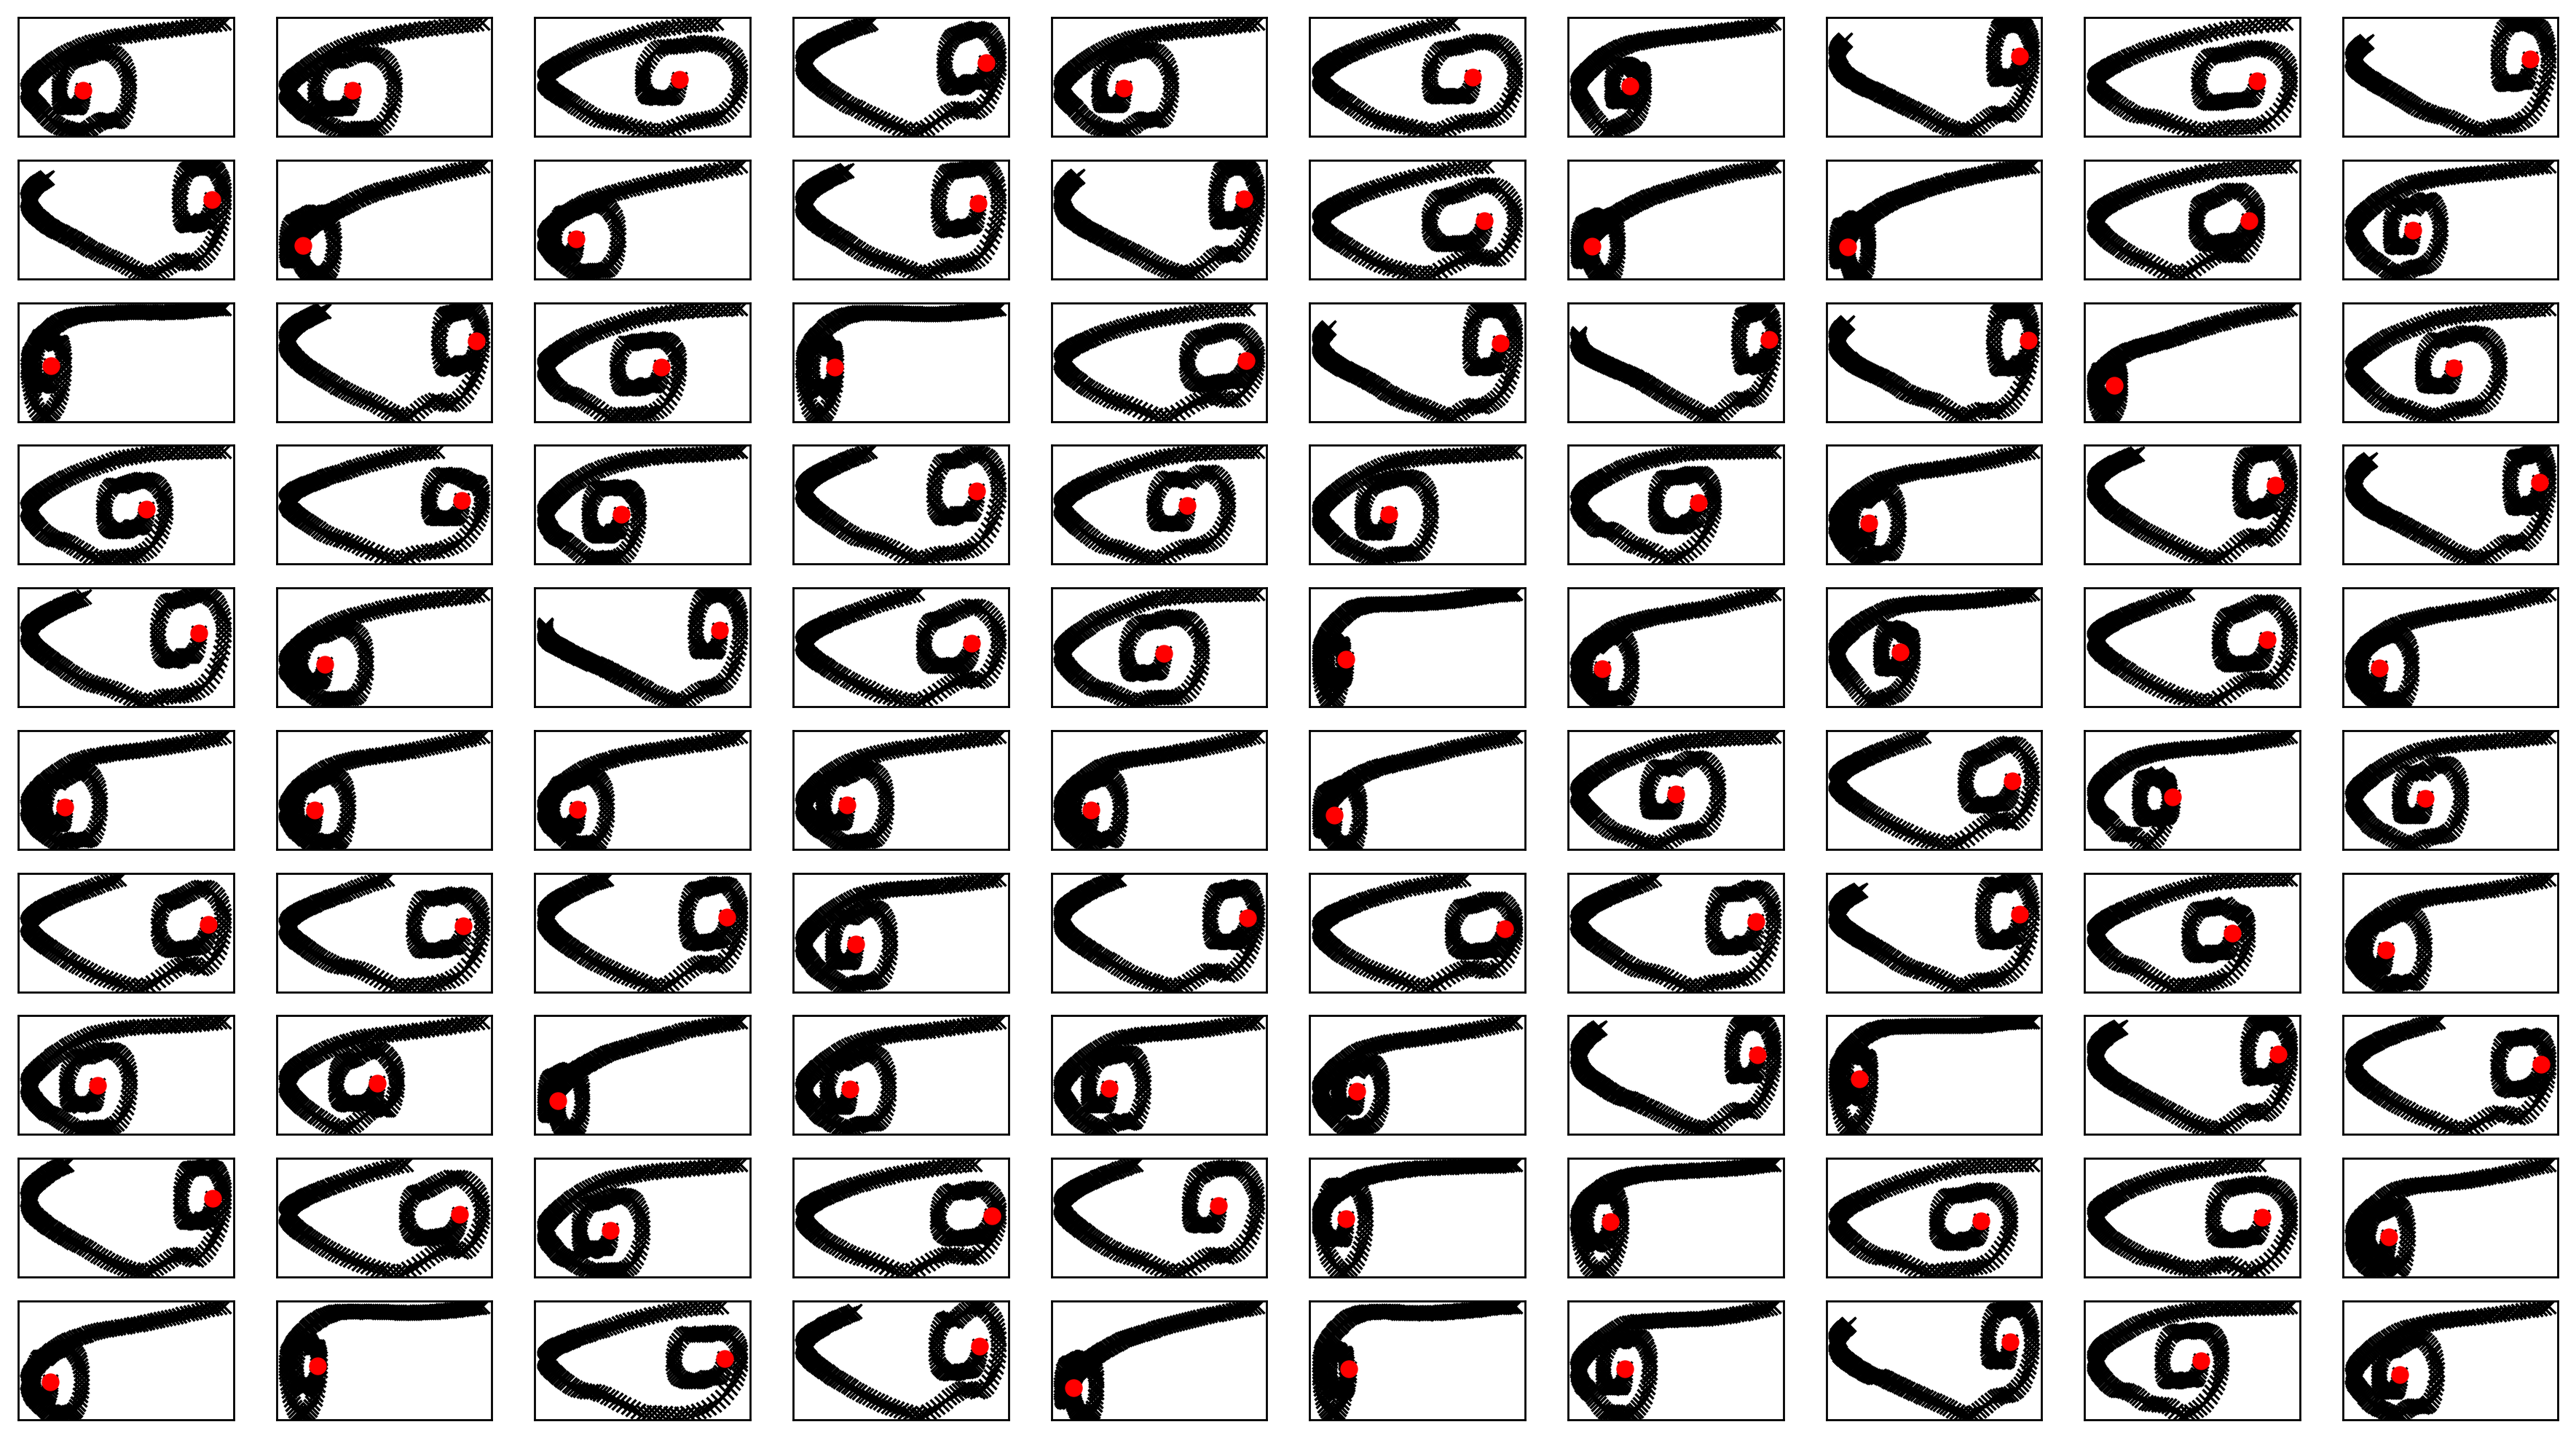

In [7]:
fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
    ax_list[-1].plot(0, 0,"ro")
plt.show()

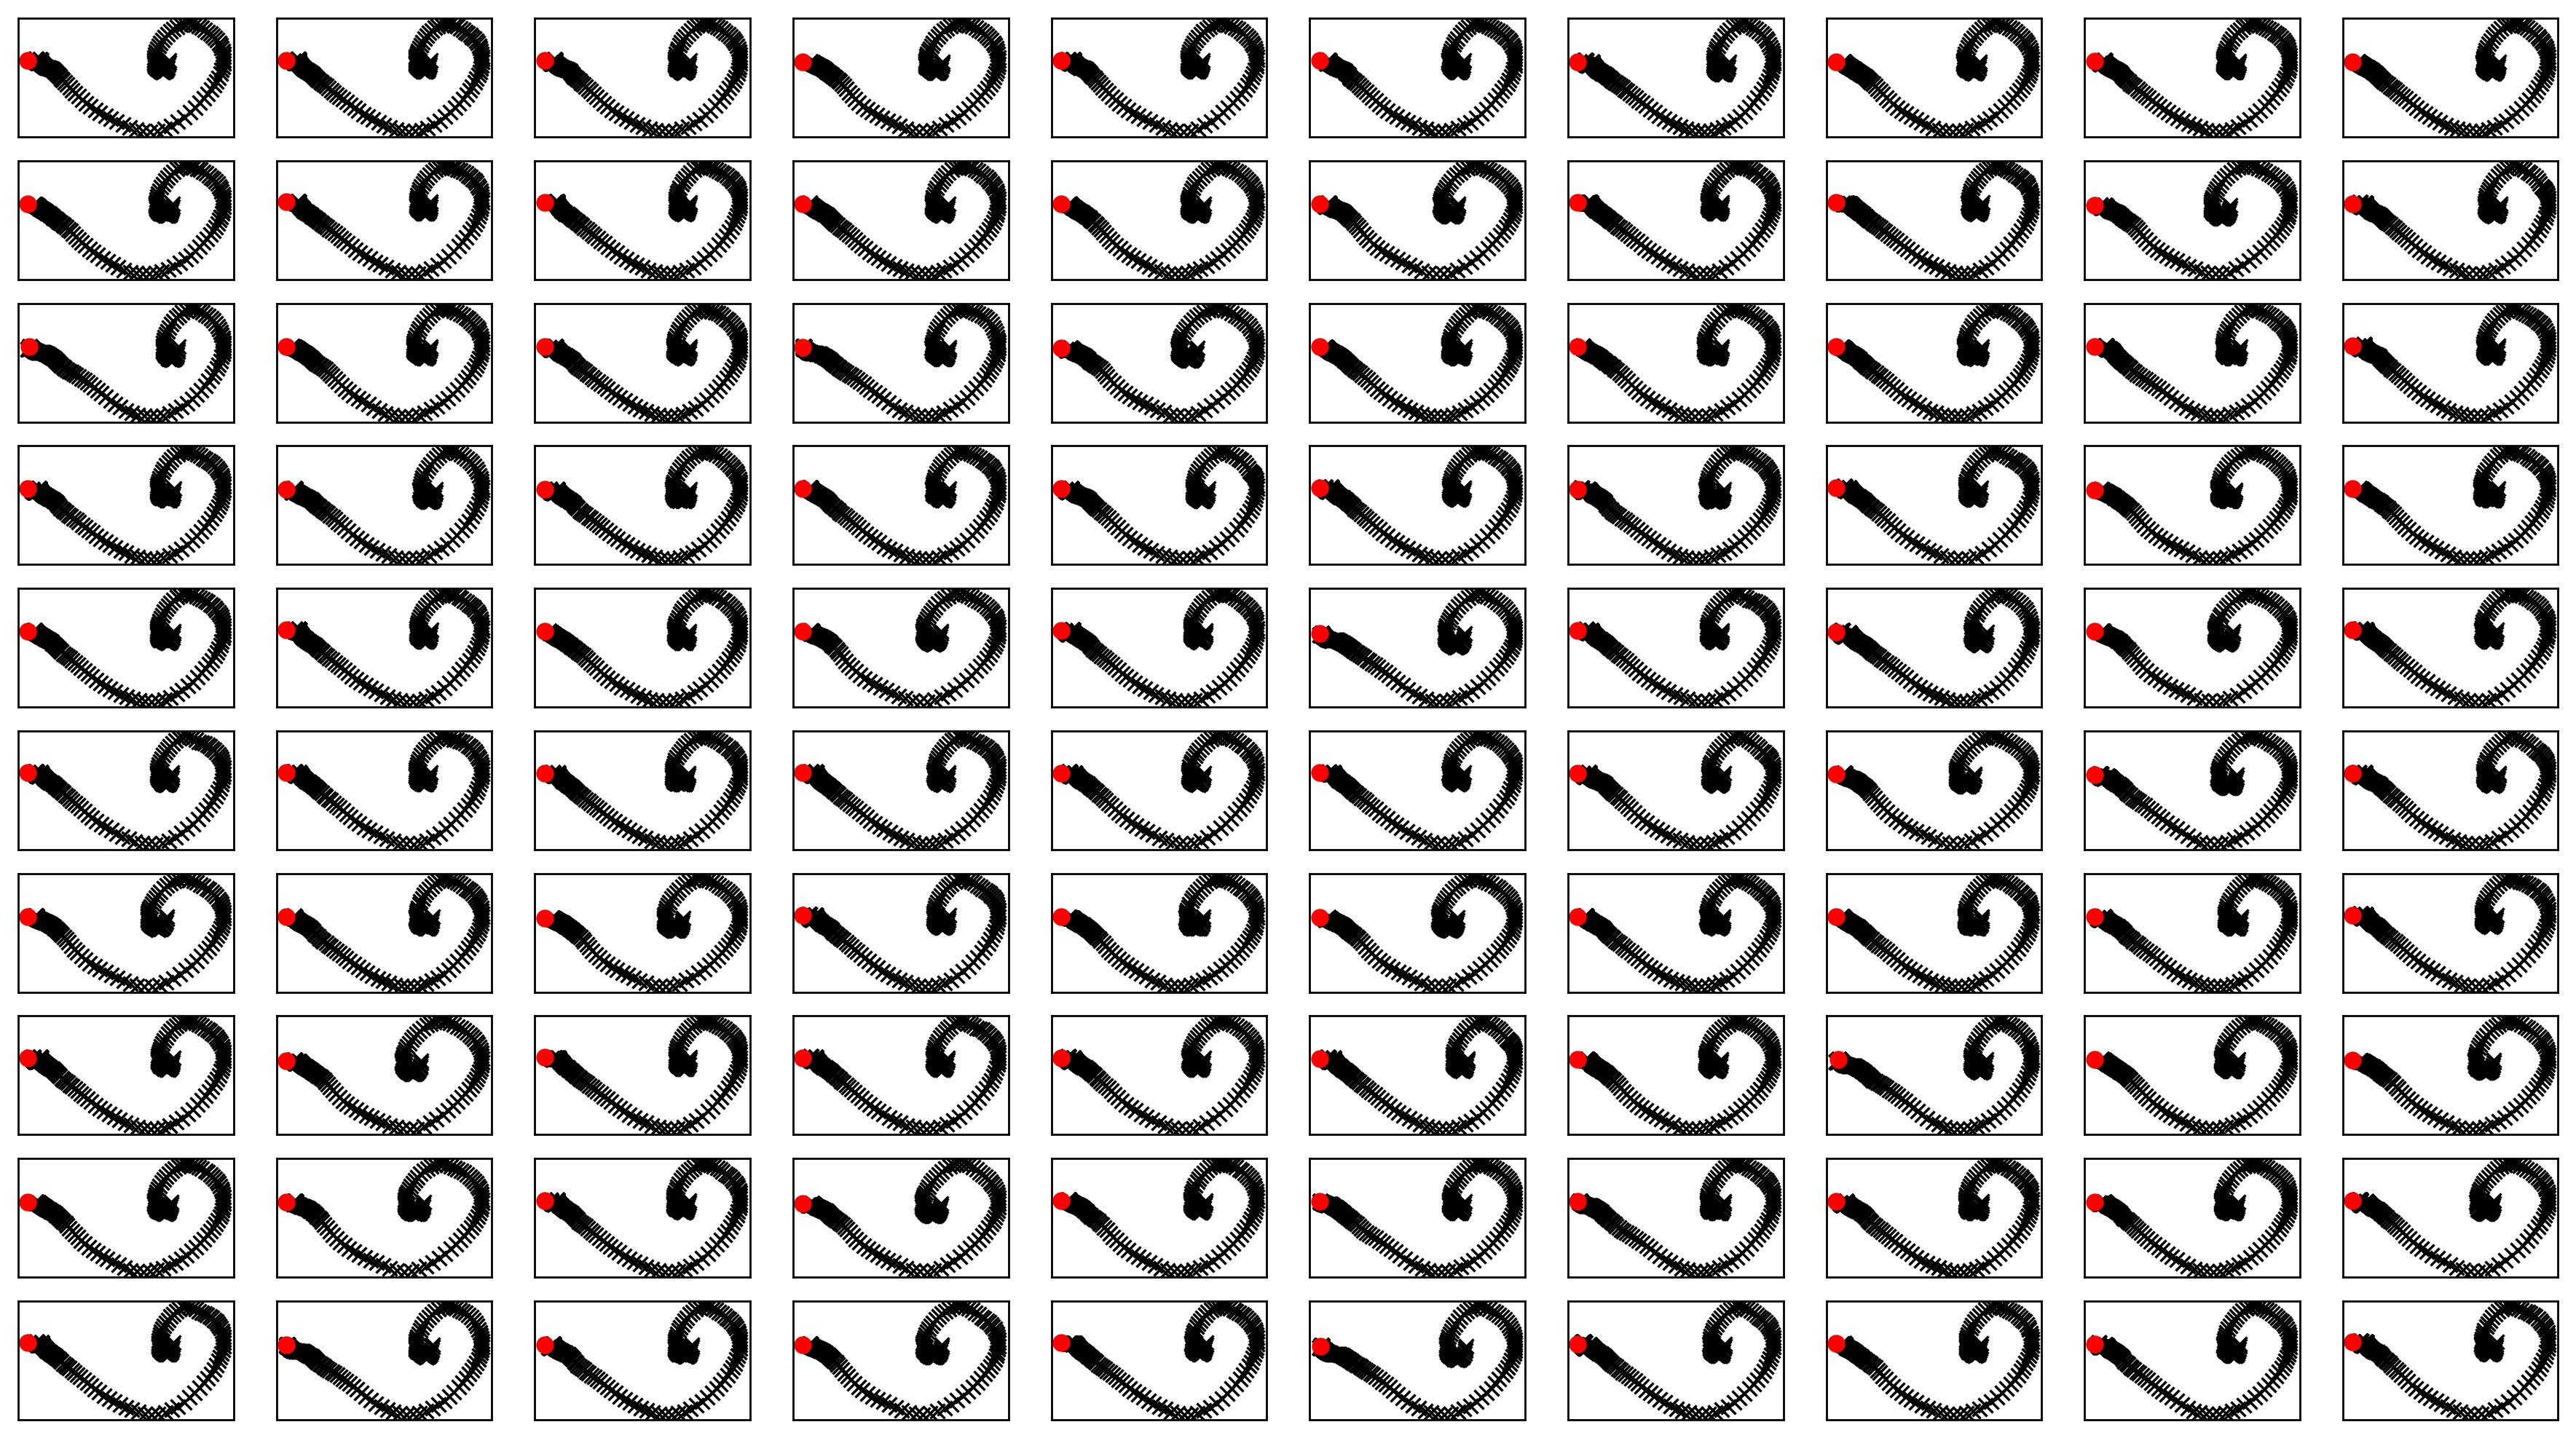

In [8]:
fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,2], iwvi.debug_realenv_rolloutdata[i][:,3],"kx") 
    ax_list[-1].plot(0, 0,"ro")
plt.show()

In [9]:
iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)


 0 9.5367431640625e-07

 1 3.26718807220459

 2 3.3215219974517822

 3 3.184783935546875

 4 3.2531051635742188

 5 3.32504940032959

 6 3.3486156463623047

 7 3.2655465602874756

 8 3.3603017330169678

 9 3.276641607284546

 10 3.3996825218200684

 11 3.2629494667053223

 12 3.372681140899658

 13 3.290661573410034

 14 3.361503839492798

 15 3.224296808242798

 16 3.285071611404419

 17 3.2088570594787598

 18 3.2305474281311035

 19 3.4887778759002686

 20 3.3762688636779785

 21 3.263179302215576

 22 3.4868099689483643

 23 3.6234288215637207

 24 3.4179959297180176

 25 3.2928695678710938

 26 3.4264817237854004

 27 3.435511589050293

 28 3.330984592437744

 29 3.478825807571411

 30 3.3358259201049805

 31 3.3691999912261963

 32 3.4828994274139404

 33 3.3585119247436523

 34 3.2207581996917725

 35 3.325591802597046

 36 3.3109734058380127

 37 3.19417667388916

 38 3.290902614593506

 39 3.3280527591705322

 40 3.1941170692443848

 41 3.4275310039520264

 42 3.3076093196868

実環境方策rollout vs Sim環境方策rollout


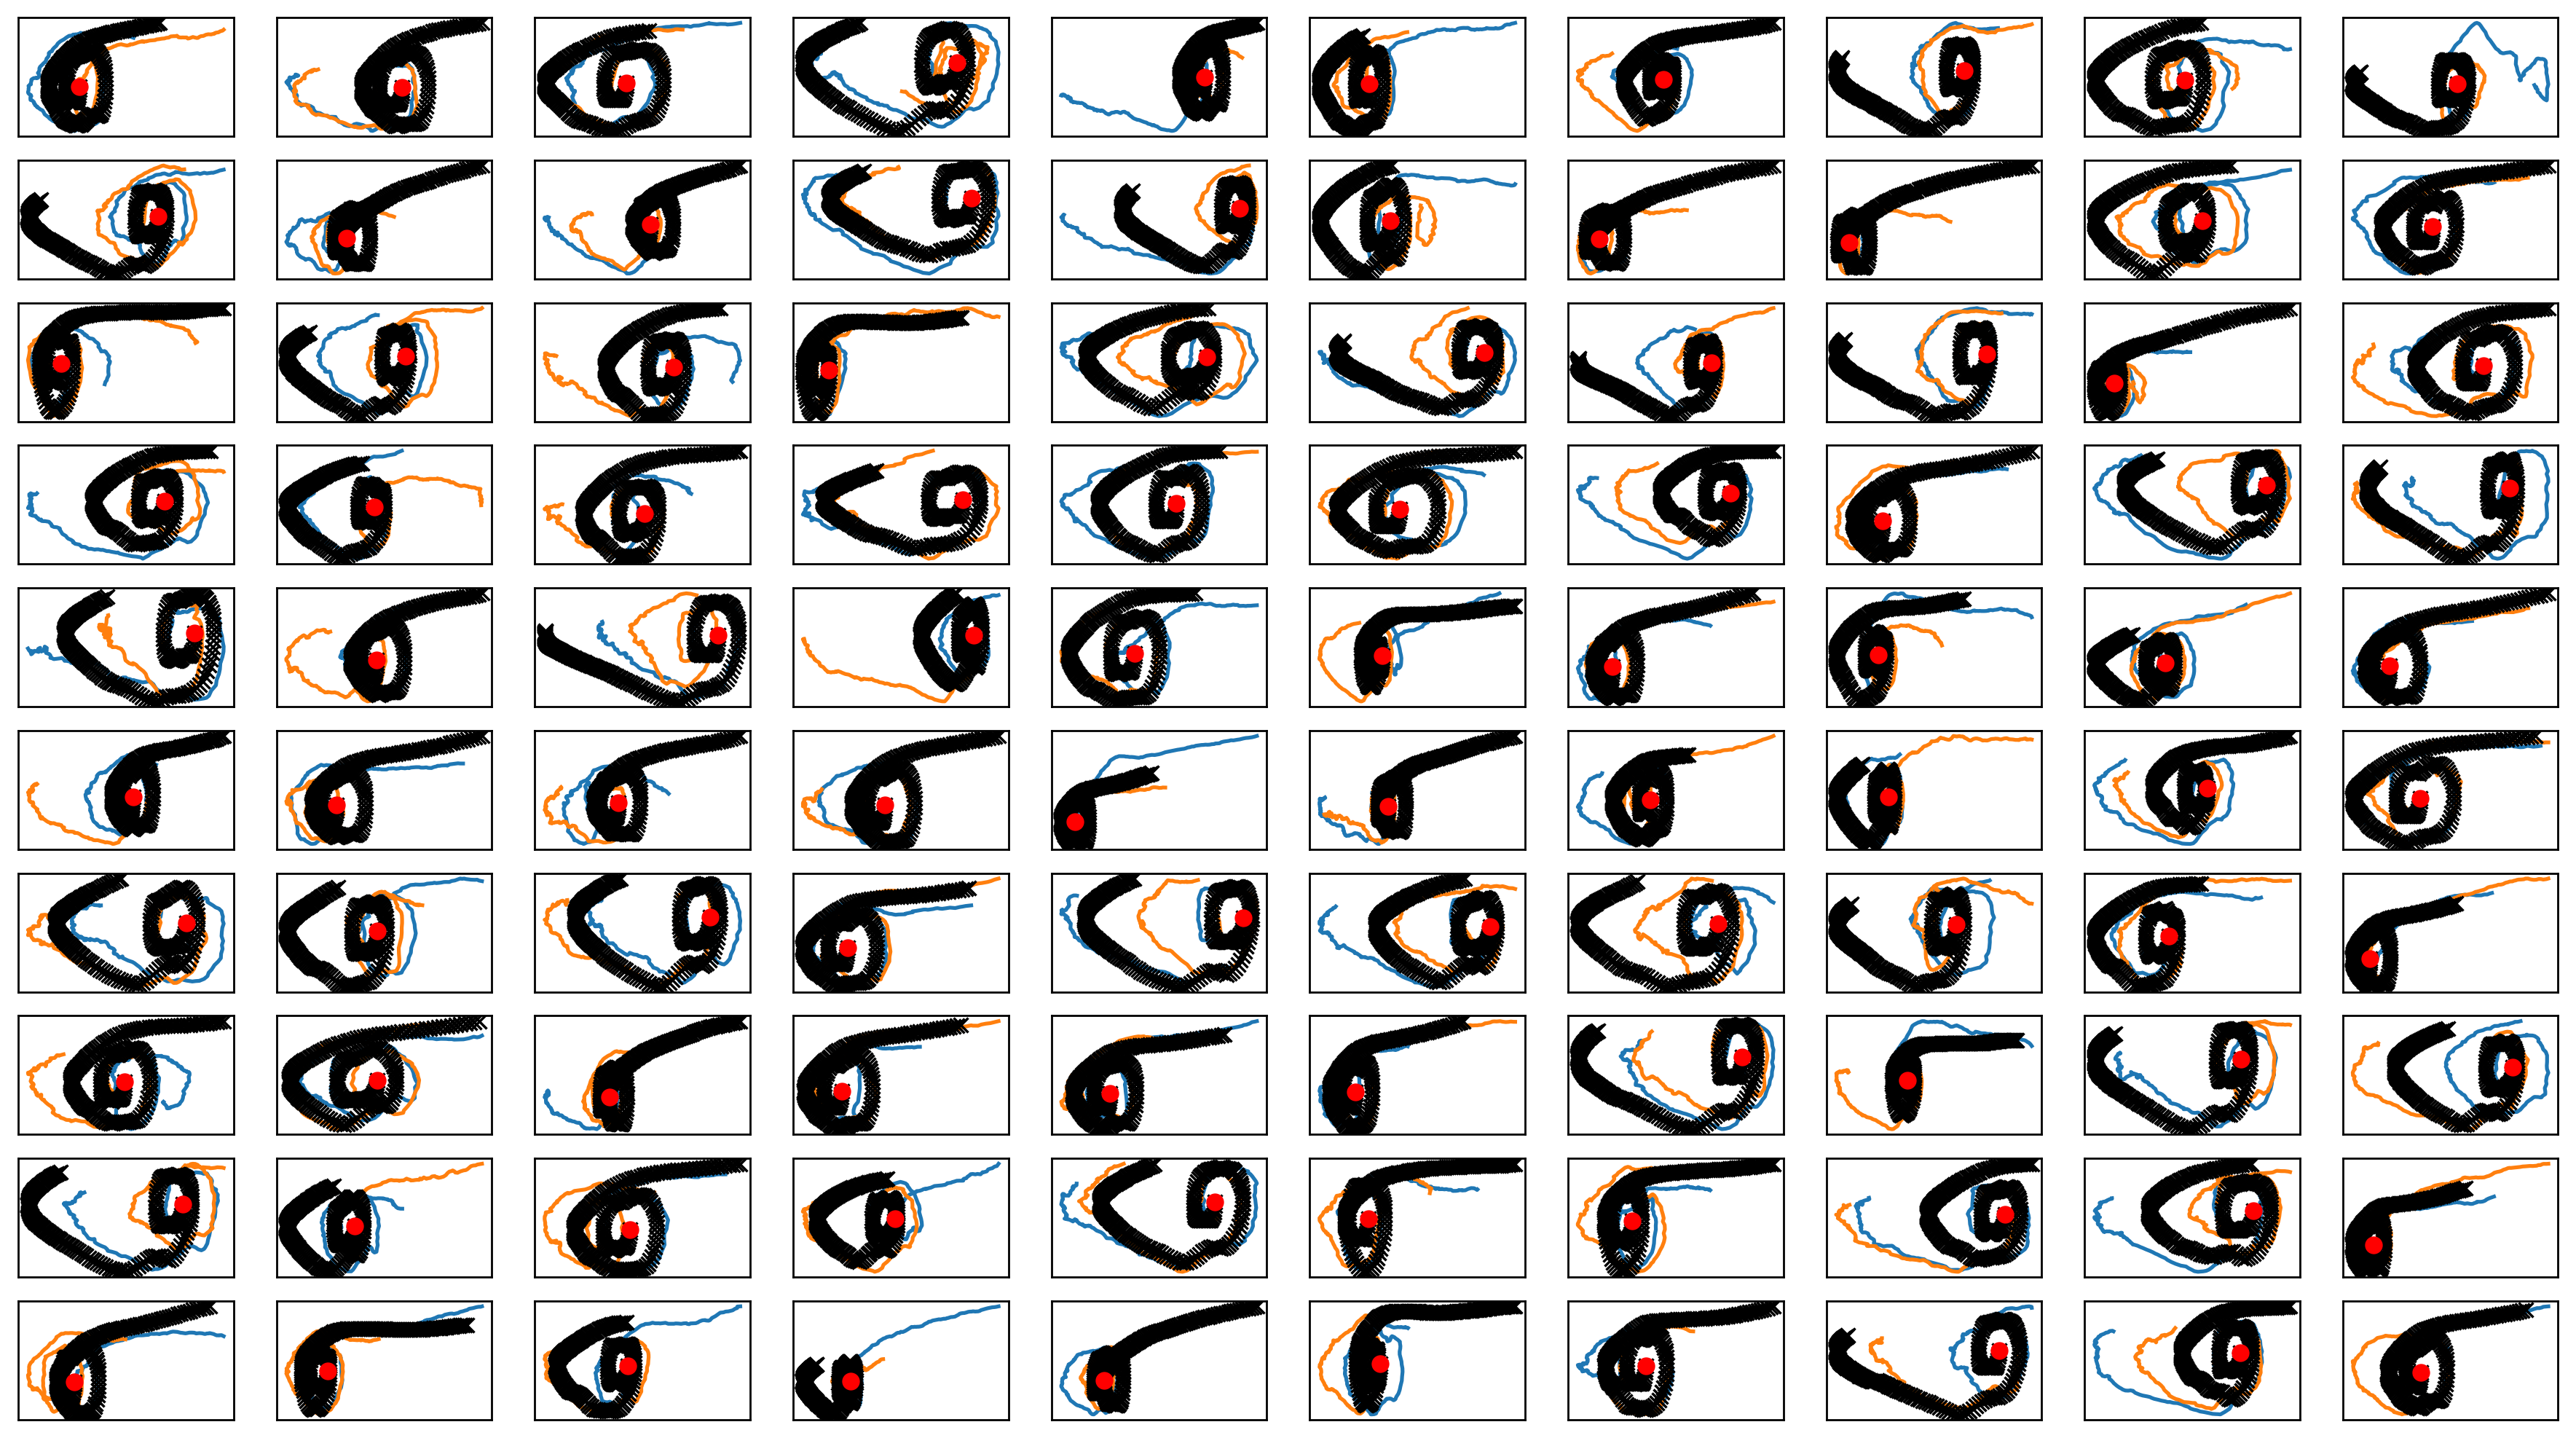

In [10]:

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
#     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")
plt.savefig(figfilenamehead+"iter1.png")
# plt.savefig(figfilenamehead+"iter0.pdf")
plt.savefig(figfilenamehead+"iter1.eps")
print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,2], simdata0a[i][:,3]) 
    ax_list[-1].plot(simdata0b[i][:,2], simdata0b[i][:,3]) 
#     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,2], iwvi.debug_realenv_rolloutdata[i][:,3],"kx")
    ax_list[-1].plot(0, 0,"ro")
plt.savefig(figfilenamehead+"iter0.png")
# plt.savefig(figfilenamehead+"iter0.pdf")
plt.savefig(figfilenamehead+"iter0.eps")
print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:
print(datetime.datetime.now())